In [285]:
import numpy as np
from plotnine import *
from plotnine.data import *
from plotnine import options
import pandas as pd
from scipy.stats import linregress, pearsonr

In [286]:
df_tmdb = pd.read_csv("/Users/jacksonquinn/Desktop/project_csvs/tmdb_raw_data.csv (2)")
df_imdb = pd.read_csv("/Users/jacksonquinn/Desktop/project_csvs/boop_mar_22_imdb_genre_sep.csv")
df_rt = pd.read_csv("/Users/jacksonquinn/Desktop/project_csvs/ppp_merged_df.csv")

df_tmdb = df_tmdb.drop('Unnamed: 0', axis=1)
df_imdb = df_imdb.drop('Unnamed: 0', axis=1)
df_rt = df_rt.drop('Unnamed: 0', axis=1)

df_imdb = df_imdb.rename(columns={'Title': 'title', 'Director': 'director', 'Year':'year', 'Genre':'genre', 'Revenue': 'revenue', 'User_Rating':'user_rating', 'Length':'length', 'Source':'source', 'Votes':'votes'})
#df_tmdb
#df_imdb

In [287]:
df_tmdb = df_tmdb.rename(columns={'rating':'user_rating'})
df_tmdb

,title,director,genre,user_rating,revenue,length,source,votes,year
0,The Godfather,Francis Ford Coppola,"['Drama', 'Crime']",87,245.07,175,TMDB,10000+ Ratings,1972
1,The Shawshank Redemption,Frank Darabont,"['Drama', 'Crime']",87,28.34,142,TMDB,10000+ Ratings,1994
2,Cuando Sea Joven,Raúl Martínez,"['Comedy', 'Fantasy']",87,2.03,115,TMDB,100+ Ratings,2022
3,The Godfather Part II,Francis Ford Coppola,"['Drama', 'Crime']",86,102.60,202,TMDB,10000+ Ratings,1974
4,Schindler's List,Steven Spielberg,"['Drama', 'History', 'War']",86,321.37,195,TMDB,10000+ Ratings,1993
...,...,...,...,...,...,...,...,...,...
245,Rocco and His Brothers,Luchino Visconti,"['Crime', 'Drama']",81,0.01,178,TMDB,250+ Ratings,1960
246,Jojo Rabbit,Taika Waititi,"['Comedy', 'War', 'Drama']",81,82.47,108,TMDB,5000+ Ratings,2019
247,"Love, Simon",Greg Berlanti,"['Comedy', 'Drama', 'Romance']",81,66.32,110,TMDB,5000+ Ratings,2018
248,Hidden Figures,Theodore Melfi,"['Drama', 'History']",81,235.96,127,TMDB,5000+ Ratings,2016


In [288]:
df_rt = df_rt.head(250)
df_rt

,title,revenue,user_rating,votes,year,source,genre,director,runtime_in_minutes
0,The Departure (2017 film),0.05,100,100+ Ratings,2017,RT,Documentary,['Lana Wilson'],87
1,The Woman Who Loves Giraffes (page does not ex...,0.04,100,Fewer than 50 Verified Ratings,2018,RT,Documentary,['Alison Reid'],83
2,Brother's Keeper (2022 film) (page does not ex...,133.90,100,Fewer than 50 Ratings,2021,RT,Drama,['Ferit Karahan'],85
3,Diana Kennedy: Nothing Fancy (page does not ex...,0.01,100,Fewer than 50 Ratings,2019,RT,Documentary,['Elizabeth Carroll'],73
4,"Sammy Davis, Jr.: I've Gotta Be Me (page does ...",2.70,100,Fewer than 50 Ratings,2017,RT,Documentary,['Samuel D. Pollard'],100
...,...,...,...,...,...,...,...,...,...
245,Henri-Georges Clouzot's Inferno,32.54,82,500+ Ratings,2009,RT,Documentary,"['Serge Bromberg', 'Ruxandra Medrea']",102
246,King Creole,5.21,82,"5,000+ Ratings",1958,RT,Musical,['Michael Curtiz'],116
247,Law of Desire,NaN,82,"5,000+ Ratings",1987,RT,Comedy,['Pedro Almodóvar'],100
248,Keep the Change (2018 film) (page does not exist),0.64,82,100+ Ratings,2017,RT,Romance,['Rachel Israel'],94


In [289]:
big_df = pd.concat([df_rt, df_imdb, df_tmdb])
big_df

,title,revenue,user_rating,votes,year,source,genre,director,runtime_in_minutes,length
0,The Departure (2017 film),0.05,100,100+ Ratings,2017,RT,Documentary,['Lana Wilson'],87.0,NaN
1,The Woman Who Loves Giraffes (page does not ex...,0.04,100,Fewer than 50 Verified Ratings,2018,RT,Documentary,['Alison Reid'],83.0,NaN
2,Brother's Keeper (2022 film) (page does not ex...,133.90,100,Fewer than 50 Ratings,2021,RT,Drama,['Ferit Karahan'],85.0,NaN
3,Diana Kennedy: Nothing Fancy (page does not ex...,0.01,100,Fewer than 50 Ratings,2019,RT,Documentary,['Elizabeth Carroll'],73.0,NaN
4,"Sammy Davis, Jr.: I've Gotta Be Me (page does ...",2.70,100,Fewer than 50 Ratings,2017,RT,Documentary,['Samuel D. Pollard'],100.0,NaN
...,...,...,...,...,...,...,...,...,...,...
245,Rocco and His Brothers,0.01,81,250+ Ratings,1960,TMDB,"['Crime', 'Drama']",Luchino Visconti,NaN,178.0
246,Jojo Rabbit,82.47,81,5000+ Ratings,2019,TMDB,"['Comedy', 'War', 'Drama']",Taika Waititi,NaN,108.0
247,"Love, Simon",66.32,81,5000+ Ratings,2018,TMDB,"['Comedy', 'Drama', 'Romance']",Greg Berlanti,NaN,110.0
248,Hidden Figures,235.96,81,5000+ Ratings,2016,TMDB,"['Drama', 'History']",Theodore Melfi,NaN,127.0


/Users/jacksonquinn/opt/anaconda3/lib/python3.9/site-packages/plotnine/layer.py:411: PlotnineWarning: geom_point : Removed 197 rows containing missing values.


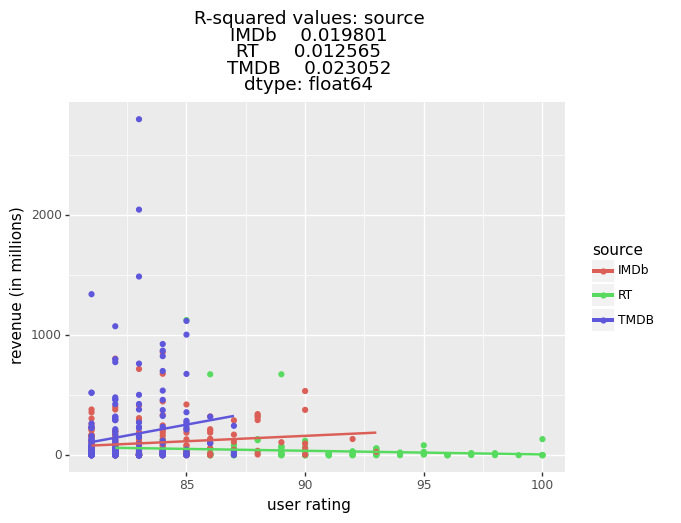

<ggplot: (8776992729191)>

In [290]:

def r_squared(x, y):
    missing_x = x.isna()
    missing_y = y.isna()
    missing = missing_x | missing_y
    x = x[~missing]
    y = y[~missing]
    corr_coef, _ = pearsonr(x, y)
    return corr_coef ** 2


(ggplot(big_df, aes(y='revenue', x='user_rating', color='source')) +
 geom_point() +
 ylab('revenue (in millions)')) + \
 xlab('user rating') + \
 ggtitle(f"R-squared values: {big_df.groupby('source').apply(lambda x: r_squared(x['revenue'], x['user_rating']))}") + \
 geom_smooth(method='lm', se=False)

/var/folders/_k/70j44p_s1n11977s45tmdvz80000gn/T/ipykernel_75743/3003368518.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/var/folders/_k/70j44p_s1n11977s45tmdvz80000gn/T/ipykernel_75743/3003368518.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/var/folders/_k/70j44p_s1n11977s45tmdvz80000gn/T/ipykernel_75743/3003368518.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the docume

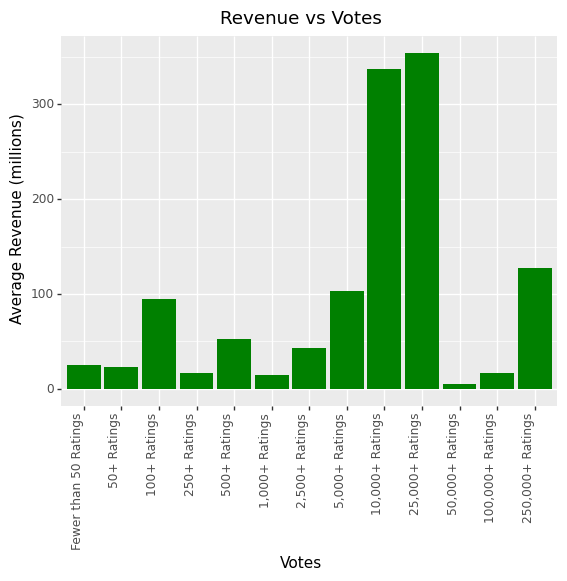

<ggplot: (8776992516187)>

In [325]:
df = big_df[['votes', 'revenue', 'source']]
df['votes'] = df['votes'].replace('100+ Verified Ratings', '100+ Ratings')
df['votes'] = df['votes'].replace('250+ Verified Ratings', '250+ Ratings')
df['votes'] = df['votes'].replace('Fewer than 50 Verified Ratings', 'Fewer than 50 Ratings')
df['votes'] = df['votes'].replace('10000+ Ratings', '10,000+ Ratings')
df['votes'] = df['votes'].replace('25000+ Ratings', '25,000+ Ratings')
df['votes'] = df['votes'].replace('2500+ Ratings', '2,500+ Ratings')
df['votes'] = df['votes'].replace('5000+ Ratings', '5,000+ Ratings')
df['votes'] = df['votes'].replace('1000+ Ratings', '1,000+ Ratings')

df['votes'] = pd.Categorical(df['votes'], categories=['Fewer than 50 Ratings', '50+ Ratings', '100+ Ratings', '250+ Ratings', '500+ Ratings', '1,000+ Ratings', '2,500+ Ratings', '5,000+ Ratings', '10,000+ Ratings', '25,000+ Ratings', '50,000+ Ratings', '100,000+ Ratings', '250,000+ Ratings'],ordered=True)
df = df.groupby('votes')['revenue'].mean().reset_index()
x_labels = ['Fewer than 50 Ratings', '50+ Ratings', '100+ Ratings', '250+ Ratings', '500+ Ratings', '1,000+ Ratings', '2,500+ Ratings', '5,000+ Ratings', '10,000+ Ratings', '25,000+ Ratings', '50,000+ Ratings', '100,000+ Ratings', '250,000+ Ratings']
#df = df.sort_values('votes')

#x_labels_ordered = df['votes'].unique().tolist()
#df['votes_int'] = pd.Categorical(df['votes'], categories=x_labels_ordered, ordered=True).factorize()[0]

ggplot(df, aes(x='votes', y='revenue')) + \
    geom_bar(stat='identity', fill='green') + \
    labs(title='Revenue vs Votes', x='Votes', y='Average Revenue (millions)') + \
    theme(axis_text_x=element_text(angle=90, hjust=1)) + \
    scale_x_discrete()






In [296]:
big_df

,title,revenue,user_rating,votes,year,source,genre,director,runtime_in_minutes,length
0,The Departure (2017 film),0.05,100,100+ Ratings,2017,RT,Documentary,['Lana Wilson'],87.0,NaN
1,The Woman Who Loves Giraffes (page does not ex...,0.04,100,Fewer than 50 Verified Ratings,2018,RT,Documentary,['Alison Reid'],83.0,NaN
2,Brother's Keeper (2022 film) (page does not ex...,133.90,100,Fewer than 50 Ratings,2021,RT,Drama,['Ferit Karahan'],85.0,NaN
3,Diana Kennedy: Nothing Fancy (page does not ex...,0.01,100,Fewer than 50 Ratings,2019,RT,Documentary,['Elizabeth Carroll'],73.0,NaN
4,"Sammy Davis, Jr.: I've Gotta Be Me (page does ...",2.70,100,Fewer than 50 Ratings,2017,RT,Documentary,['Samuel D. Pollard'],100.0,NaN
...,...,...,...,...,...,...,...,...,...,...
245,Rocco and His Brothers,0.01,81,250+ Ratings,1960,TMDB,"['Crime', 'Drama']",Luchino Visconti,NaN,178.0
246,Jojo Rabbit,82.47,81,5000+ Ratings,2019,TMDB,"['Comedy', 'War', 'Drama']",Taika Waititi,NaN,108.0
247,"Love, Simon",66.32,81,5000+ Ratings,2018,TMDB,"['Comedy', 'Drama', 'Romance']",Greg Berlanti,NaN,110.0
248,Hidden Figures,235.96,81,5000+ Ratings,2016,TMDB,"['Drama', 'History']",Theodore Melfi,NaN,127.0


/var/folders/_k/70j44p_s1n11977s45tmdvz80000gn/T/ipykernel_75743/3152584134.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/var/folders/_k/70j44p_s1n11977s45tmdvz80000gn/T/ipykernel_75743/3152584134.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/var/folders/_k/70j44p_s1n11977s45tmdvz80000gn/T/ipykernel_75743/3152584134.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the docume

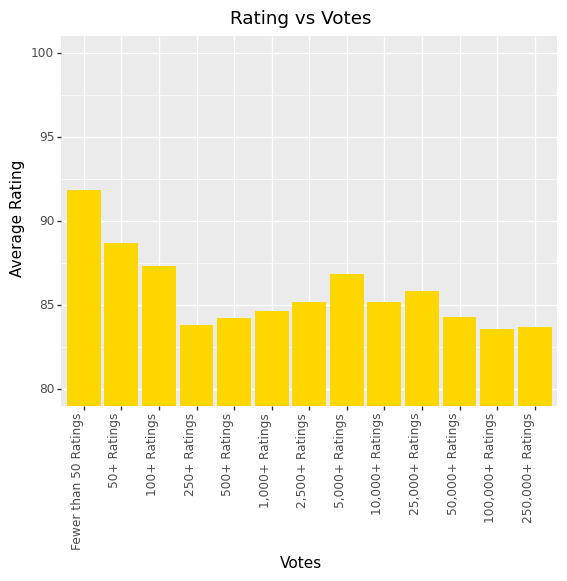

<ggplot: (8777043457991)>

In [336]:
big_df['votes'] = big_df['votes'].apply(lambda x: x.strip())

df = big_df[['votes', 'user_rating', 'source']]
df['votes'] = df['votes'].replace('100+ Verified Ratings', '100+ Ratings')
df['votes'] = df['votes'].replace('250+ Verified Ratings', '250+ Ratings')
df['votes'] = df['votes'].replace('Fewer than 50 Verified Ratings', 'Fewer than 50 Ratings')
df['votes'] = df['votes'].replace('10000+ Ratings', '10,000+ Ratings')
df['votes'] = df['votes'].replace('25000+ Ratings', '25,000+ Ratings')
df['votes'] = df['votes'].replace('2500+ Ratings', '2,500+ Ratings')
df['votes'] = df['votes'].replace('5000+ Ratings', '5,000+ Ratings')
df['votes'] = df['votes'].replace('1000+ Ratings', '1,000+ Ratings')

df['votes'] = pd.Categorical(df['votes'], categories=['Fewer than 50 Ratings', '50+ Ratings', '100+ Ratings', '250+ Ratings', '500+ Ratings', '1,000+ Ratings', '2,500+ Ratings', '5,000+ Ratings', '10,000+ Ratings', '25,000+ Ratings', '50,000+ Ratings', '100,000+ Ratings', '250,000+ Ratings'],ordered=True)
df = df.groupby('votes')['user_rating'].mean().reset_index()
x_labels = ['Fewer than 50 Ratings', '50+ Ratings', '100+ Ratings', '250+ Ratings', '500+ Ratings', '1,000+ Ratings', '2,500+ Ratings', '5,000+ Ratings', '10,000+ Ratings', '25,000+ Ratings', '50,000+ Ratings', '100,000+ Ratings', '250,000+ Ratings']
#df = df.sort_values('votes')

#x_labels_ordered = df['votes'].unique().tolist()
#df['votes_int'] = pd.Categorical(df['votes'], categories=x_labels_ordered, ordered=True).factorize()[0]

ggplot(df, aes(x='votes', y='user_rating')) + \
    geom_bar(stat='identity', fill='gold') + \
    labs(title='Rating vs Votes', x='Votes', y='Average Rating') + \
    theme(axis_text_x=element_text(angle=90, hjust=1)) + \
    coord_cartesian(ylim=(80, 100)) + \
    scale_x_discrete()

#df



In [339]:
df['votes'] = pd.Categorical(df['votes'], categories=['Fewer than 50 Ratings', '50+ Ratings', '100+ Ratings', '250+ Ratings', '500+ Ratings', '1,000+ Ratings', '2,500+ Ratings', '5,000+ Ratings', '10,000+ Ratings', '25,000+ Ratings', '50,000+ Ratings', '100,000+ Ratings', '250,000+ Ratings'],ordered=True)
df = df.groupby('votes')['rating'].mean().reset_index()
x_labels = ['Fewer than 50 Ratings', '50+ Ratings', '100+ Ratings', '250+ Ratings', '500+ Ratings', '1,000+ Ratings', '2,500+ Ratings', '5,000+ Ratings', '10,000+ Ratings', '25,000+ Ratings', '50,000+ Ratings', '100,000+ Ratings', '250,000+ Ratings']
#df = df.sort_values('votes')
df
#x_labels_ordered = df['votes'].unique().tolist()
#df['votes_int'] = pd.Categorical(df['votes'], categories=x_labels_ordered, ordered=True).factorize()[0]

ggplot(df, aes(x='votes', y='rating')) + \
    geom_bar(stat='identity', fill='lightblue') + \
    labs(title='Rating vs Votes', x='Votes', y='Average Rating') + \
    theme(axis_text_x=element_text(angle=90, hjust=1)) + \
    scale_x_discrete()

KeyError: 'Column not found: rating'